In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod, GreenwellMethod, SejongOhMethod
from artemis.interactions_methods.model_specific import ConditionalMinimalDepthMethod, SplitScoreMethod
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
model = RandomForestRegressor(n_estimators=80, max_depth=12).fit(X, y)

### Greenwell Method

In [5]:
vint = GreenwellMethod()
vint.fit(model, X, 100, show_progress=True) 

Calculating one vs one interactions:   4%|▎         | 1/28 [00:13<06:09, 13.67s/it]

In [ ]:
vint.ovo

,Feature 1,Feature 2,Greenwell Variable Interaction Measure
0,MedInc,AveOccup,0.189762
1,MedInc,Longitude,0.102410
2,HouseAge,AveOccup,0.089838
3,MedInc,Latitude,0.083159
4,Latitude,Longitude,0.069229
5,MedInc,HouseAge,0.042969
6,MedInc,AveBedrms,0.042340
7,AveOccup,Longitude,0.042307
8,AveOccup,Latitude,0.039703
9,MedInc,AveRooms,0.022333


In [ ]:
vint.variable_importance

,Feature,Value
0,AveOccup,0.562514
1,MedInc,0.518293
2,Latitude,0.332785
3,Longitude,0.167935
4,HouseAge,0.081494
5,AveBedrms,0.071081
6,AveRooms,0.028032
7,Population,0.011267


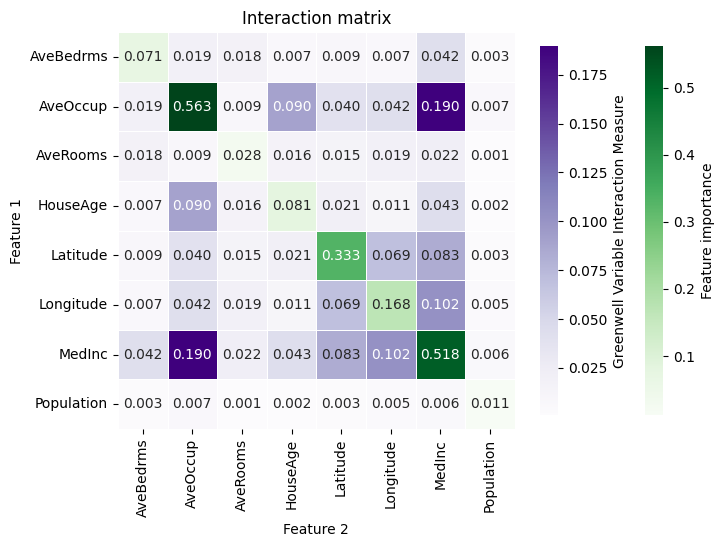

In [ ]:
vint.plot(figsize=(8, 6)) 

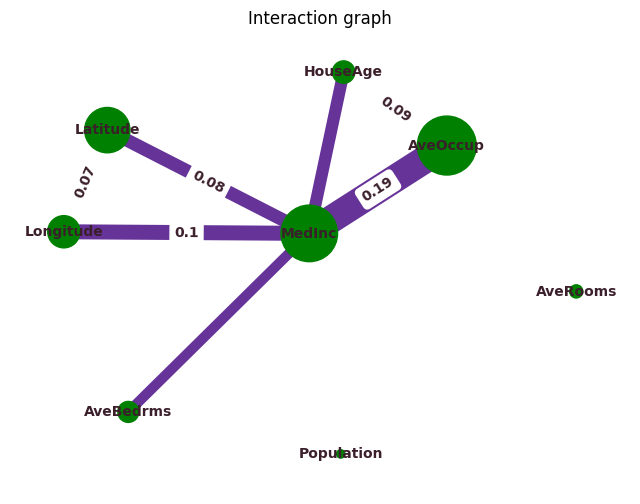

In [ ]:
vint.plot("graph")  

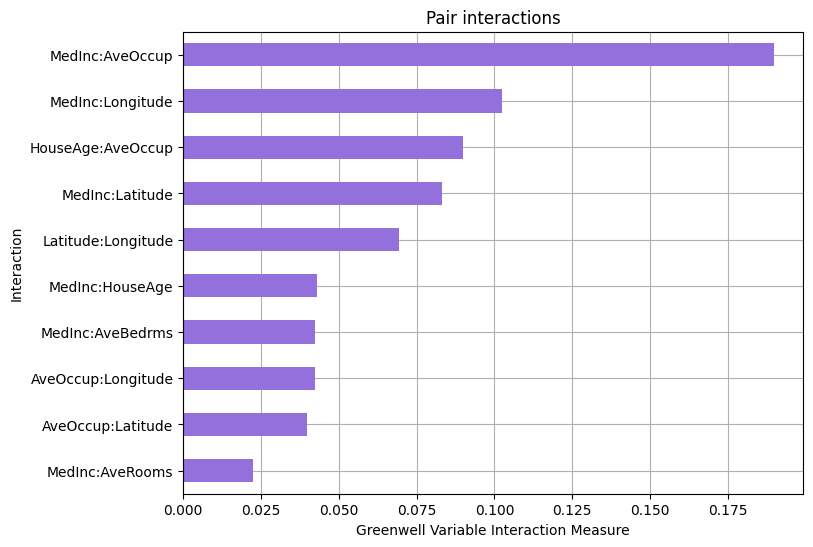

In [ ]:
vint.plot("bar_chart")

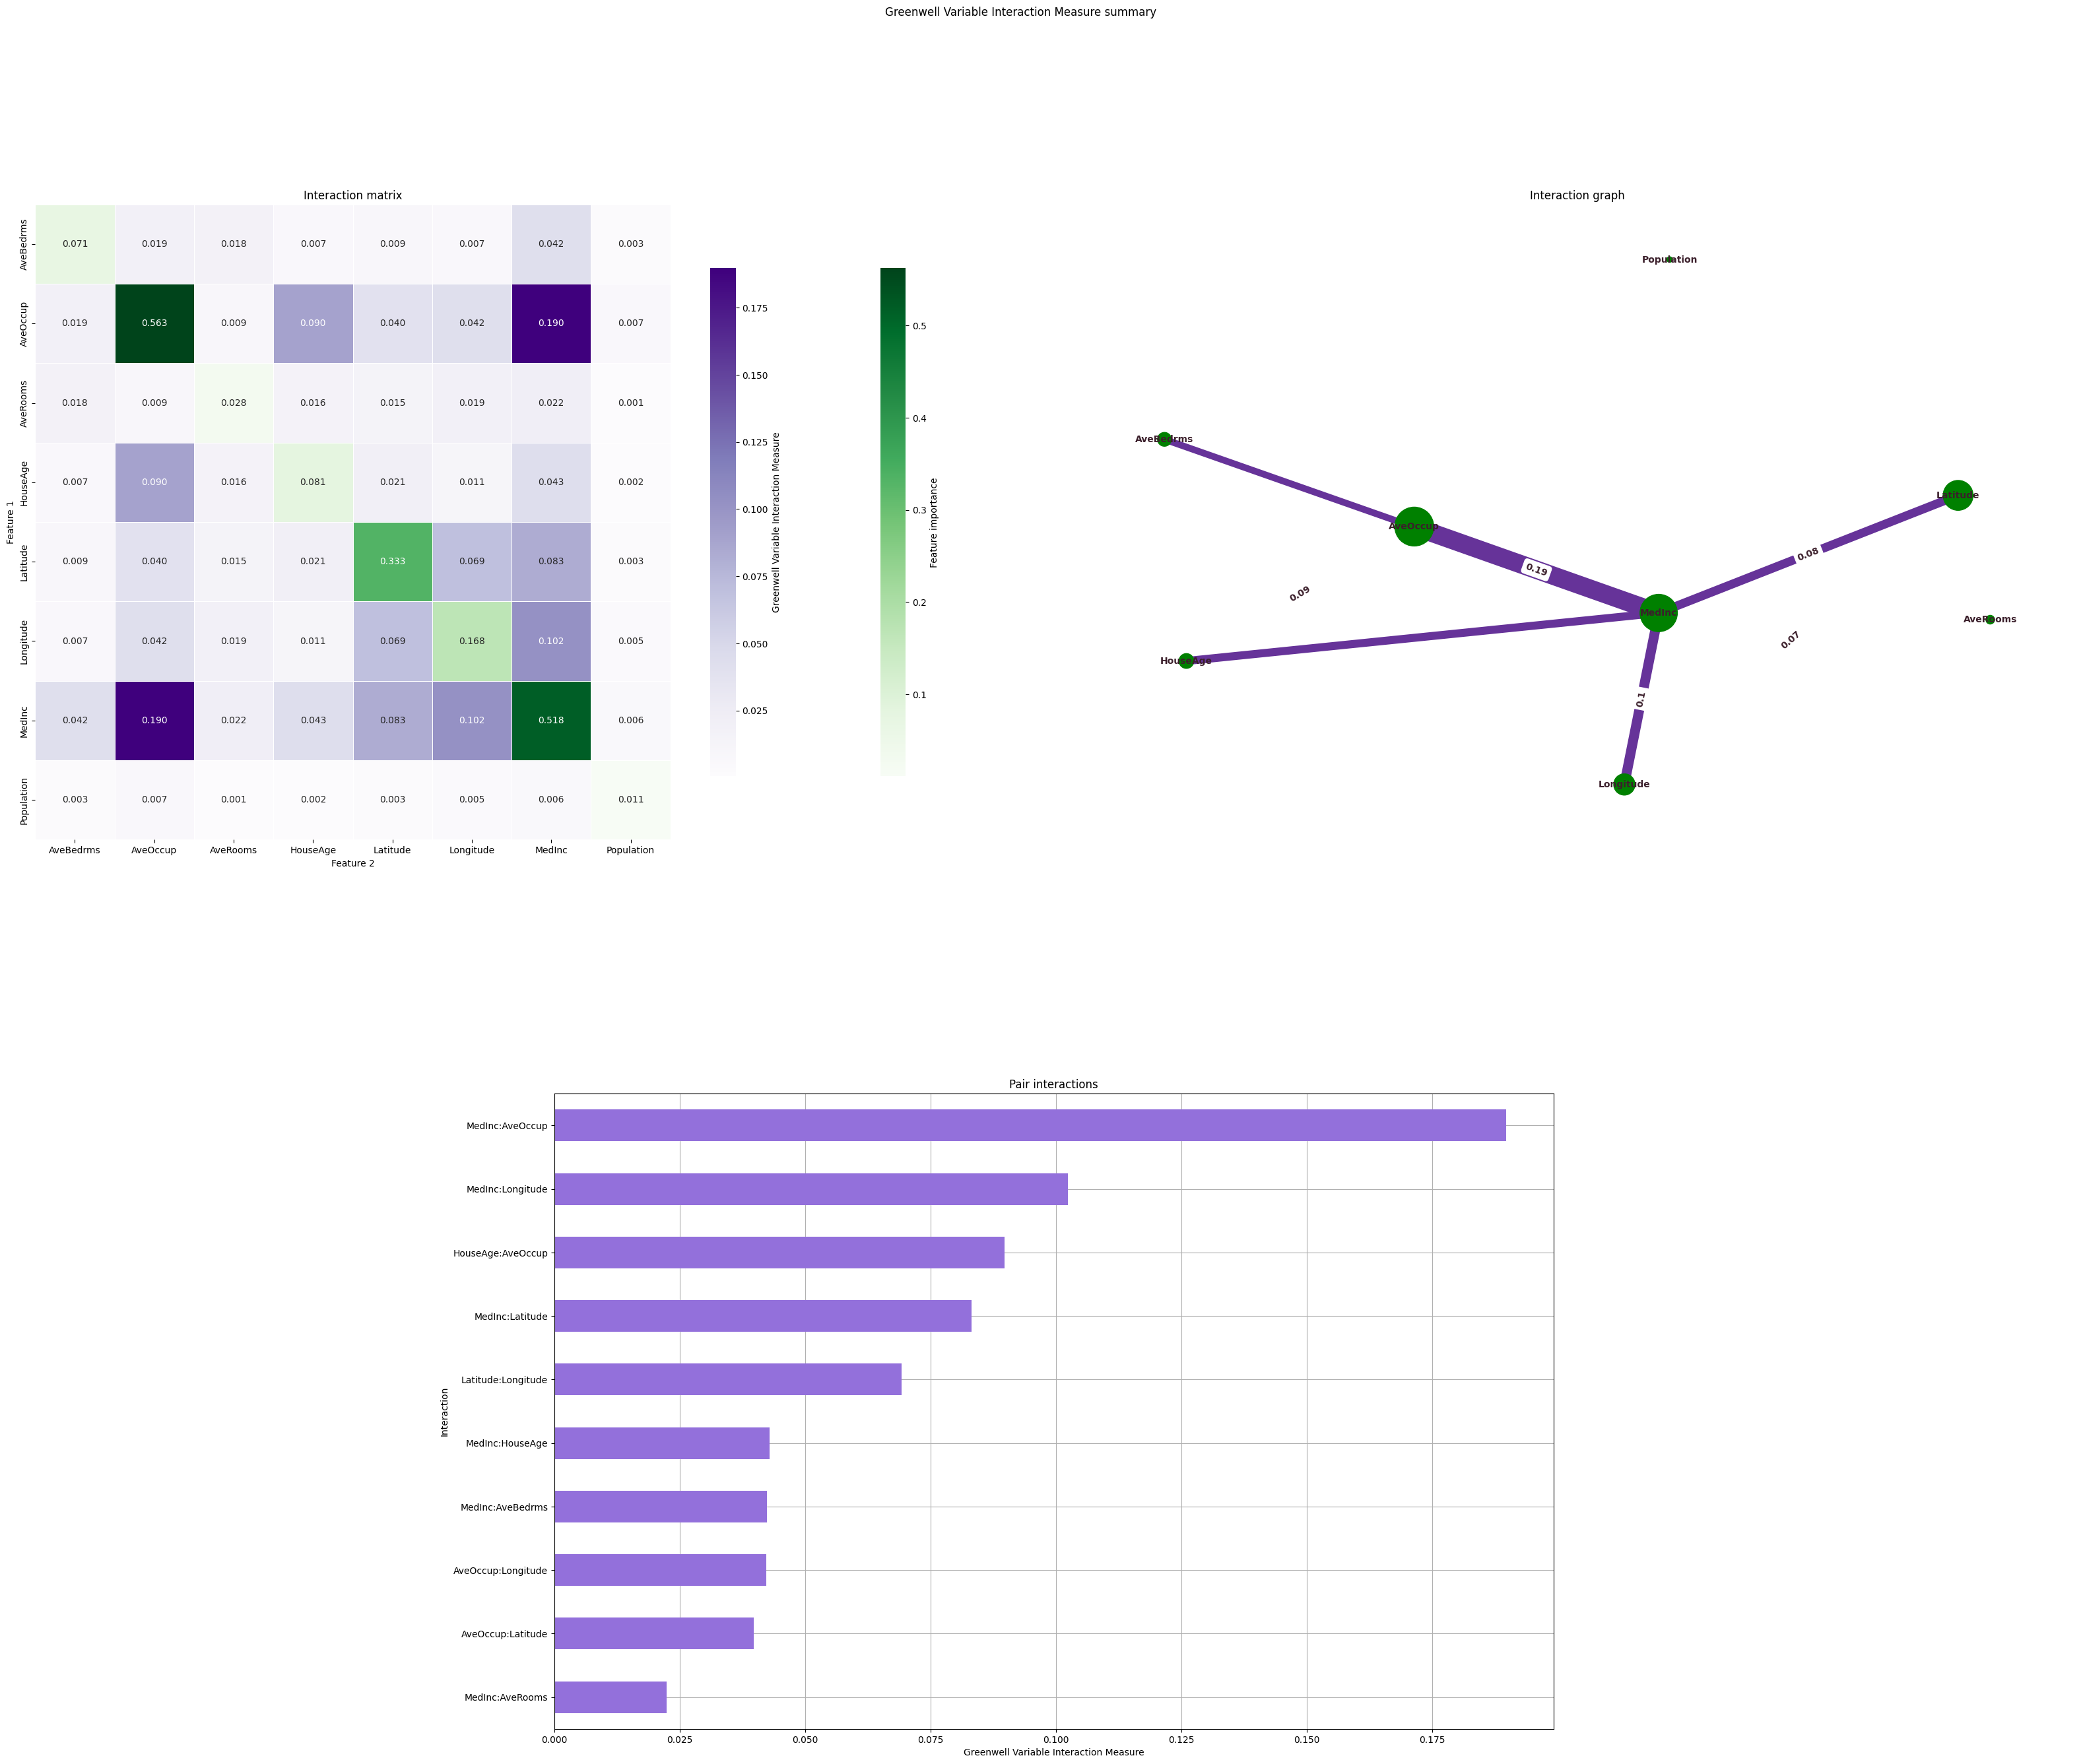

In [ ]:
vint.plot("summary")

In [ ]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features 

Calculating variable importance: 100%|██████████| 3/3 [00:00<00:00, 78.14it/s]


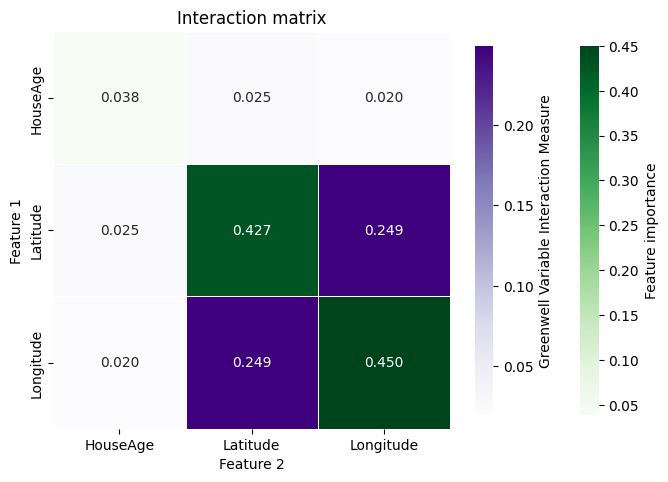

In [ ]:
vint_subset.plot()

### H statistic

In [ ]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 100, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 8/8 [00:00<00:00, 42.80it/s]


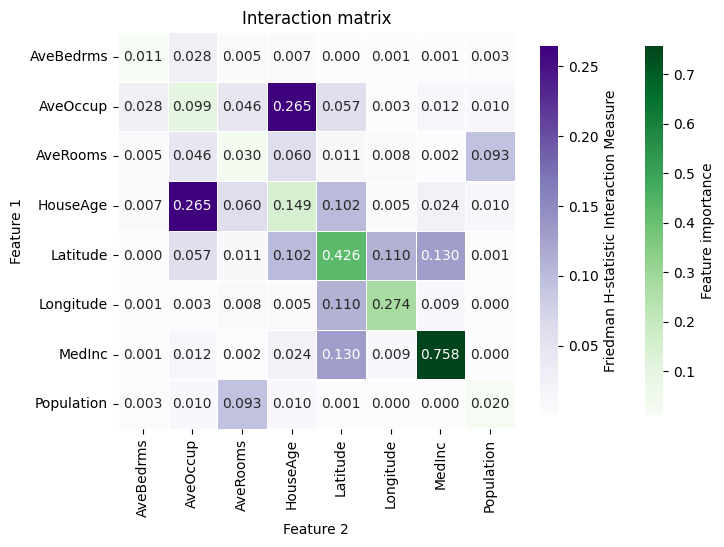

In [ ]:
h_stat.plot()

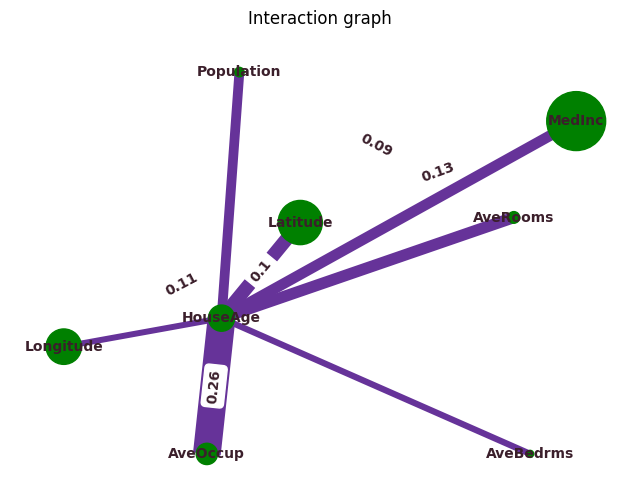

In [ ]:
h_stat.plot("graph")

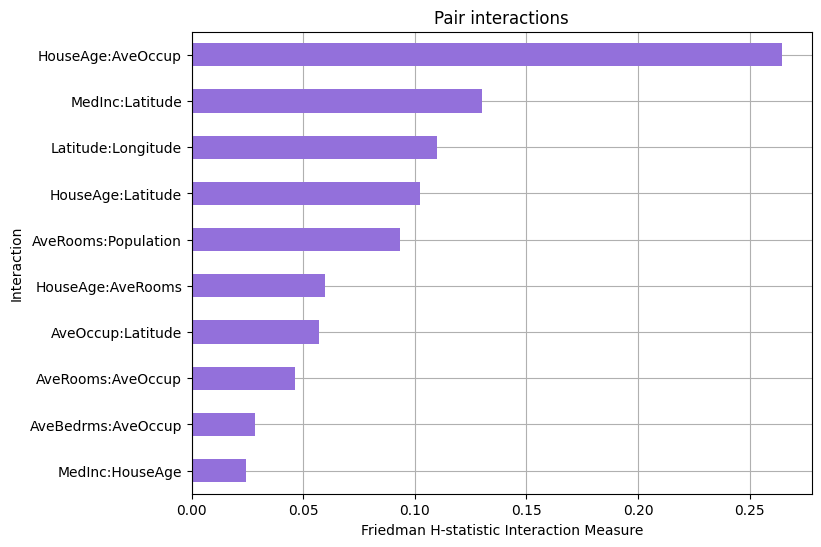

In [ ]:
h_stat.plot("bar_chart")

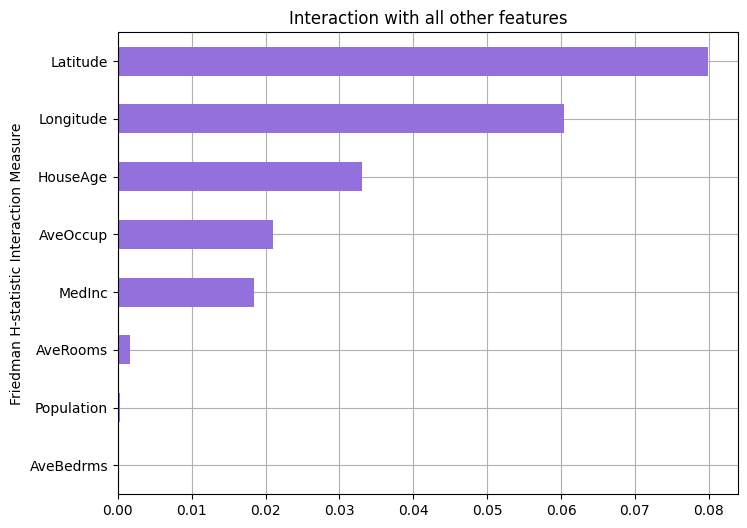

In [ ]:
h_stat.plot("bar_chart_ova")

In [ ]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 3/3 [00:00<00:00, 19.43it/s]


### Sejong Oh Method

In [ ]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, show_progress=True)  

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 36.43it/s]


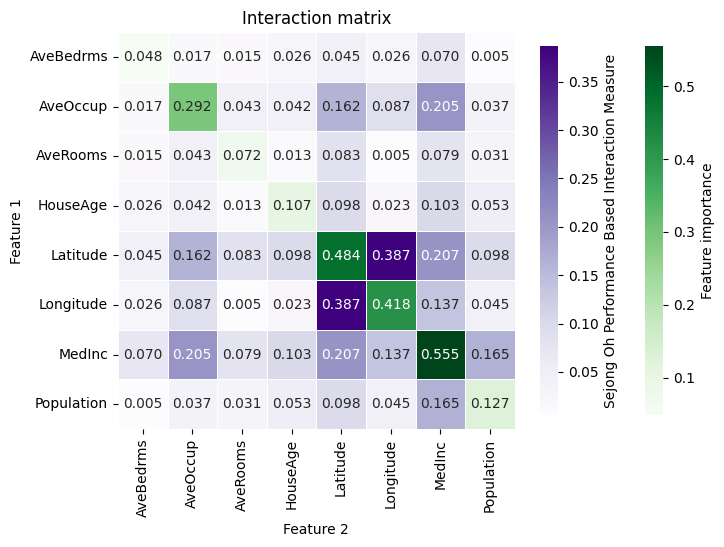

In [ ]:
perf_based.plot() 

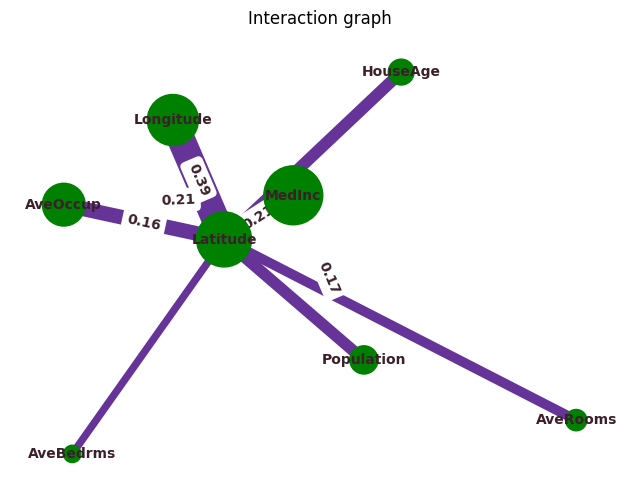

In [ ]:
perf_based.plot("graph")  # interaction graph - SejongOhInteraction

In [ ]:
perf_based_subset = SejongOhMethod()
perf_based_subset.fit(model, X, y, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 48.60it/s]


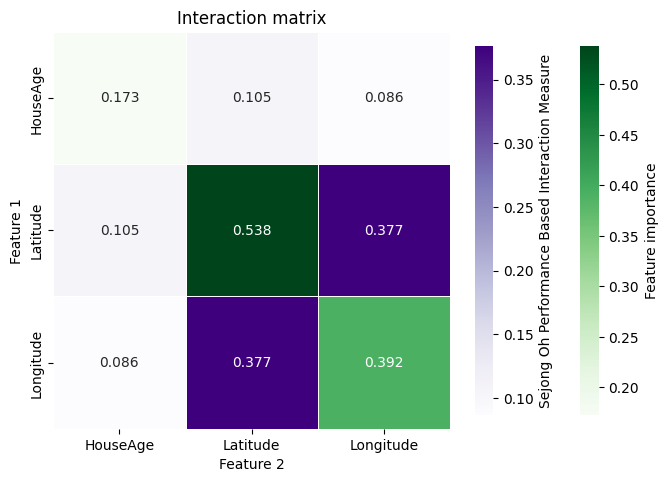

In [ ]:
perf_based_subset.plot()

### Comparator

In [ ]:
from artemis.comparision import FeatureInteractionMethodComparator

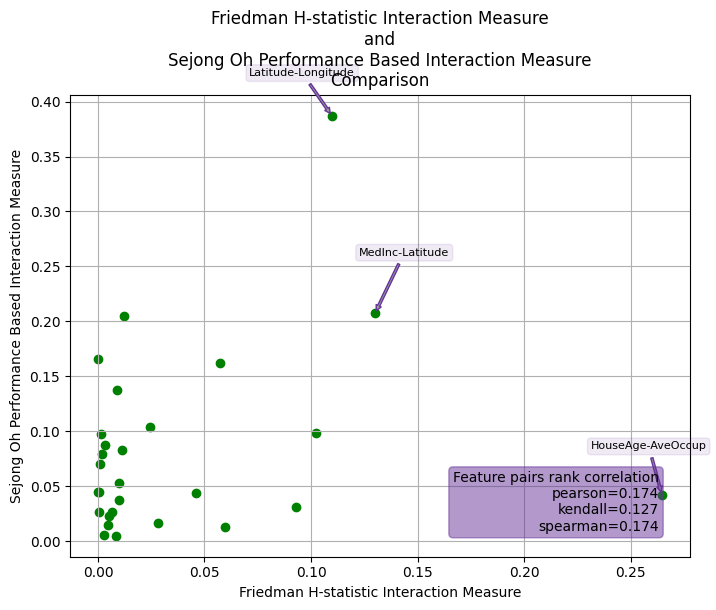

In [ ]:
comparator = FeatureInteractionMethodComparator()
comparator.summary(h_stat, perf_based)

### Conditional Depth Method

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", max_depth=5).fit(X, y)
cond = ConditionalMinimalDepthMethod()
cond.fit(model_rf, X,show_progress=True)  

100%|██████████| 100/100 [00:00<00:00, 169.67it/s]


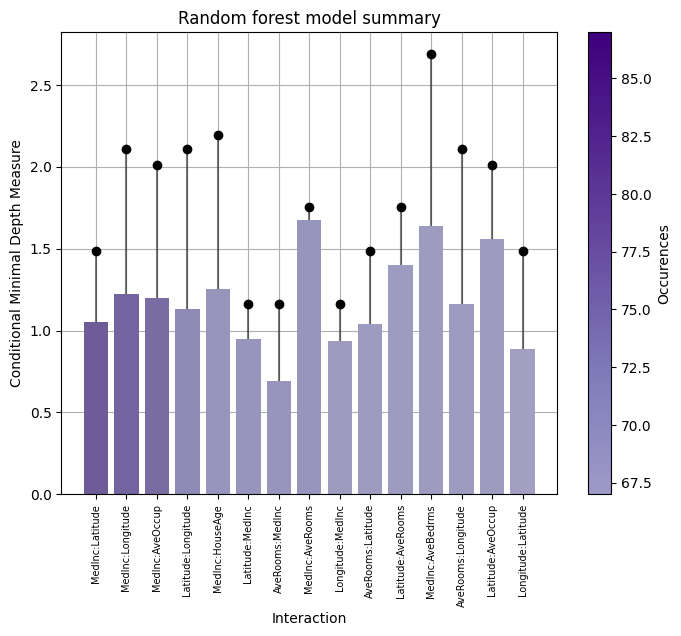

In [ ]:
cond.plot("bar_chart_conditional")

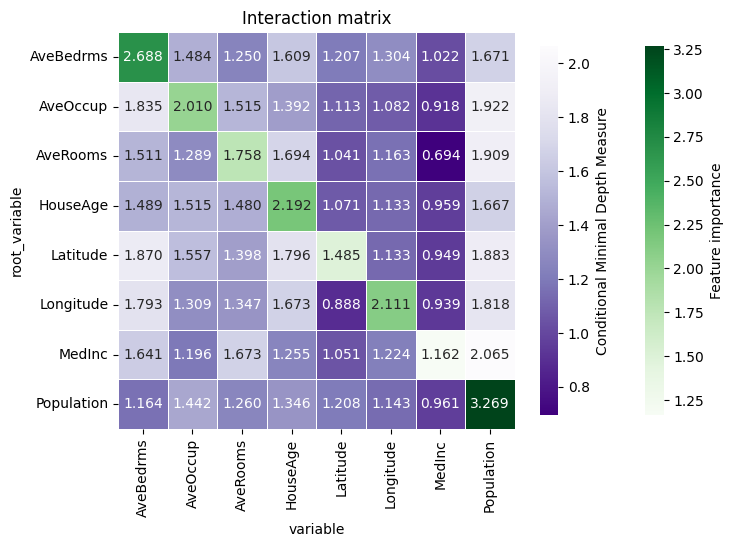

In [ ]:
cond.plot()

### Split Score Method

In [ ]:
from xgboost import XGBRegressor
model_gb = XGBRegressor(n_estimators=80, max_depth=4).fit(X, y)

In [ ]:
split_score = SplitScoreMethod()
split_score.fit(model_gb, X, show_progress=True, interaction_selected_metric = "sum_gain",)

100%|██████████| 80/80 [00:01<00:00, 77.45it/s]


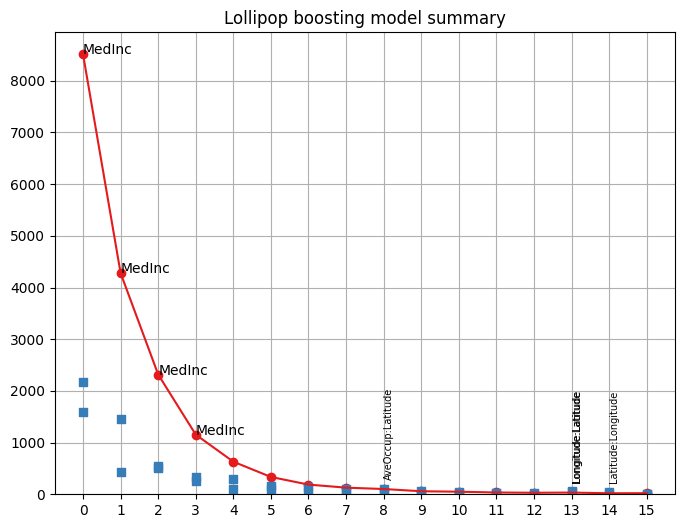

In [ ]:
split_score.plot("lollipop", max_depth=1)

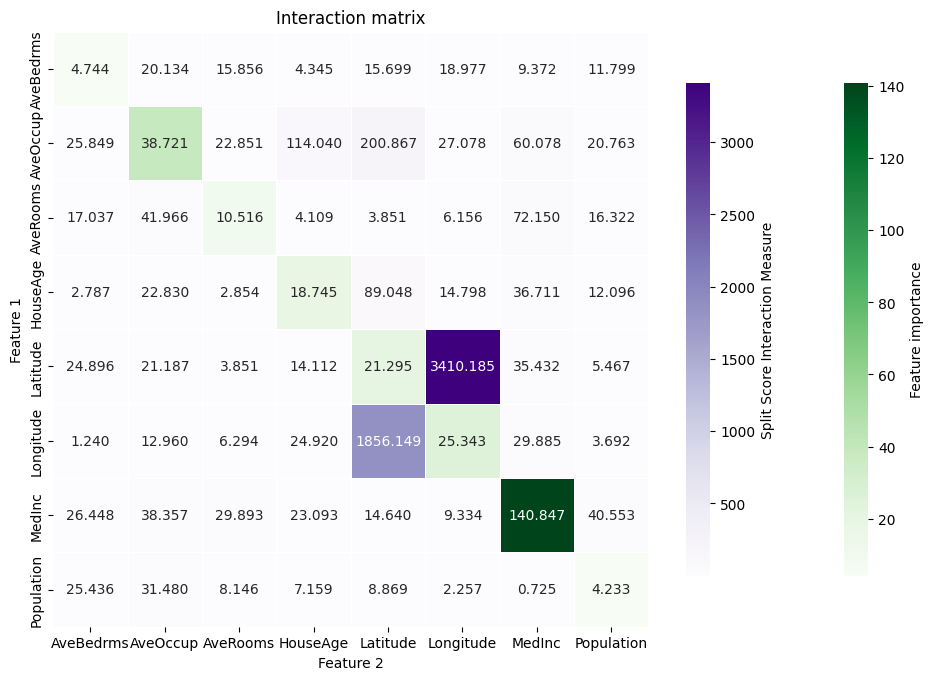

In [ ]:
split_score.plot(figsize=(12, 8))

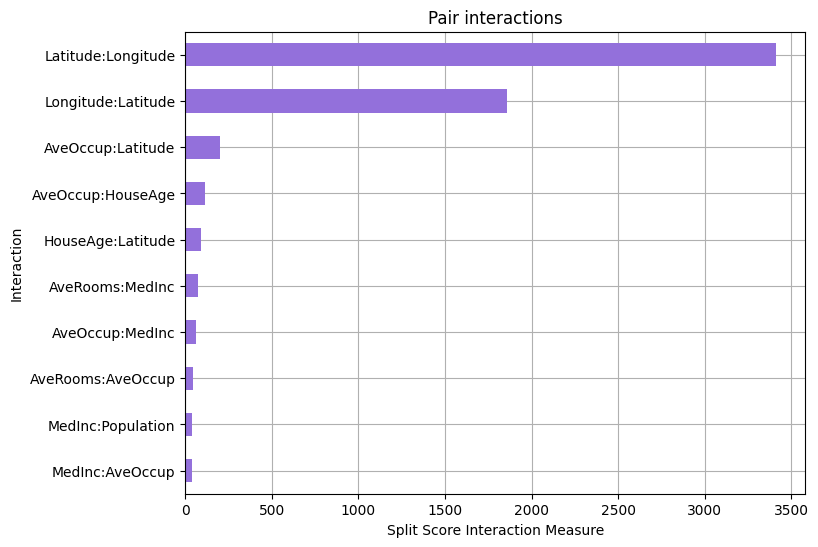

In [ ]:
split_score.plot("bar_chart")

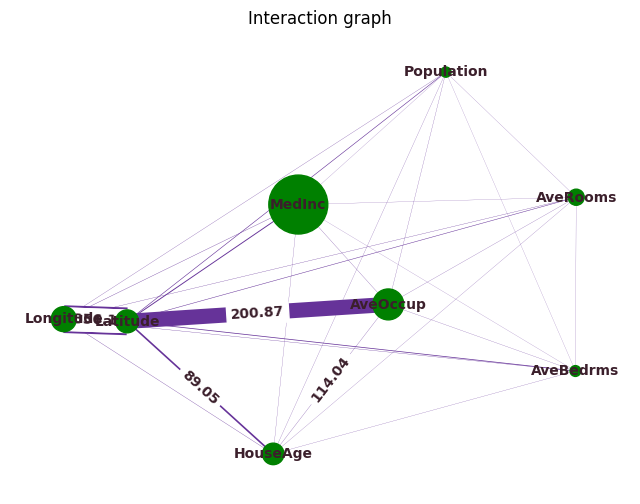

In [ ]:
split_score.plot("graph")